In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data_dic = {'label' : ["buying", "maint", "doors", "persons", "lug_boot", "safety", "distribution"]}

data = pd.read_csv("car.data", sep=",", names=data_dic["label"])

df = pd.DataFrame(data)
df = pd.get_dummies(df)

X = df.iloc[:, 0:21]
y = df.iloc[:, 21:25]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(925, 21)
(925, 4)


In [26]:
model = Sequential([
    Dense(21, input_shape=(21,), activation="relu"),
    Dense(4, activation="softmax", name="last"),
])

model.compile(loss="mse", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=100, verbose=True)

Epoch 1/100
29/29 [==============================] - 0s 638us/step - loss: 0.2117
Epoch 2/100
29/29 [==============================] - 0s 637us/step - loss: 0.2059
Epoch 3/100
29/29 [==============================] - 0s 585us/step - loss: 0.2002
Epoch 4/100
29/29 [==============================] - 0s 579us/step - loss: 0.1945
Epoch 5/100
29/29 [==============================] - 0s 548us/step - loss: 0.1887
Epoch 6/100
29/29 [==============================] - 0s 580us/step - loss: 0.1831
Epoch 7/100
29/29 [==============================] - 0s 642us/step - loss: 0.1775
Epoch 8/100
29/29 [==============================] - 0s 716us/step - loss: 0.1720
Epoch 9/100
29/29 [==============================] - 0s 642us/step - loss: 0.1667
Epoch 10/100
29/29 [==============================] - 0s 574us/step - loss: 0.1615
Epoch 11/100
29/29 [==============================] - 0s 642us/step - loss: 0.1566
Epoch 12/100
29/29 [==============================] - 0s 616us/step - loss: 0.1519
Epoch 13/100


In [27]:
pred = model.predict(X_test)

18/18 [==============================] - 0s 477us/step


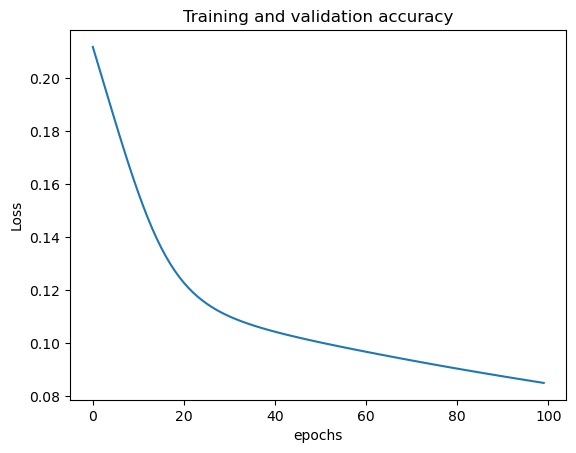

In [28]:
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Loss")
x = np.arange(0, 100)
plt.plot(x, history.history["loss"])

In [33]:
y_test

,distribution_acc,distribution_good,distribution_unacc,distribution_vgood
599,0,0,1,0
1201,1,0,0,0
628,0,0,1,0
1498,1,0,0,0
1263,0,0,1,0
...,...,...,...,...
1034,0,0,1,0
341,1,0,0,0
147,0,0,1,0
360,0,0,1,0


In [34]:
result = ["acc", "good", "unacc", "vgood"]

for i in range(len(pred)):
    print(f"[[{result[np.argmax(pred[i])]}]]\n{y_test.iloc[i]}")

[[unacc]]
distribution_acc      0
distribution_good     0
distribution_unacc    1
distribution_vgood    0
Name: 599, dtype: uint8
[[unacc]]
distribution_acc      1
distribution_good     0
distribution_unacc    0
distribution_vgood    0
Name: 1201, dtype: uint8
[[unacc]]
distribution_acc      0
distribution_good     0
distribution_unacc    1
distribution_vgood    0
Name: 628, dtype: uint8
[[unacc]]
distribution_acc      1
distribution_good     0
distribution_unacc    0
distribution_vgood    0
Name: 1498, dtype: uint8
[[unacc]]
distribution_acc      0
distribution_good     0
distribution_unacc    1
distribution_vgood    0
Name: 1263, dtype: uint8
[[unacc]]
distribution_acc      1
distribution_good     0
distribution_unacc    0
distribution_vgood    0
Name: 931, dtype: uint8
[[unacc]]
distribution_acc      0
distribution_good     0
distribution_unacc    1
distribution_vgood    0
Name: 23, dtype: uint8
[[unacc]]
distribution_acc      0
distribution_good     0
distribution_unacc    1
distri